In [69]:
%matplotlib inline
import seaborn
import numpy, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 8)

Carrega o audio

In [111]:
filename = 'Voz-3.wav'
x, sr = librosa.load(filename)

Adiciona o arquivo de audio

In [112]:
ipd.Audio(x, rate=sr)

Exibe o CQT do sinal

#CQT = Constante-Q de Transformação. Ajuda na redução de ruidos.

Onde:
    
    x: séries temporais de audio
    sr: taxa de amostragem de x (>0)
    bins_per_octave: numero de bins por oitava    
    n_bins: numero de bins de frequencia, começando na frequencia minima(C1 ~= 32,70 Hz)

In [113]:
# bins_per_octave = 36
# n_bins = 300
bins_per_octave = 12 * 3
n_octaves = 7
cqt = librosa.cqt(x, sr=sr, n_bins=(n_octaves * bins_per_octave), bins_per_octave=bins_per_octave)
log_cqt = librosa.amplitude_to_db(cqt)

# librosa.display.specshow(abs(cqt), sr=sr, x_axis='time', y_axis='cqt_note')

cqt.shape

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(252, 2190)

#specshow(data[, x_coords, y_coords, x_axis, …]) 
    
    return: Exibe um espectrograma / cromatro / cqt / etc.

Objetivo: Identificar o tom de cada nota e substitua cada nota por um tom puro desse tom.

Text(0.5, 1.0, 'Tom de cada nota')

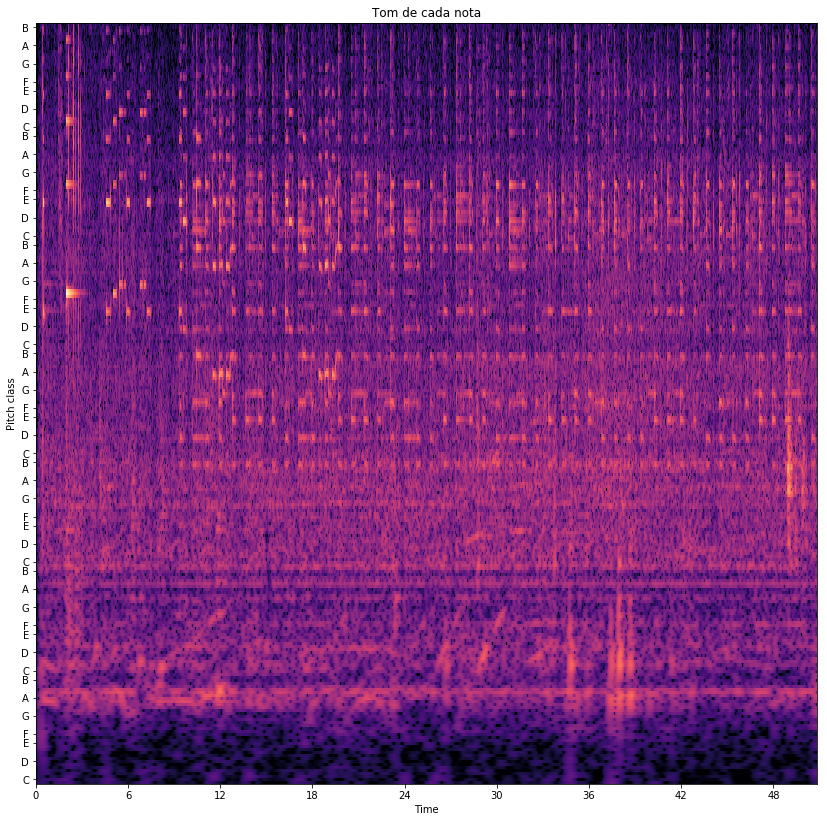

In [147]:
librosa.display.specshow(log_cqt, sr=sr, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave)
plt.title('Tom de cada nota')
plt.colorbar(format='%2.0f dB')


Para onset.onset_strength:

    os parametros são:

        x: séries temporais de audio
        sr: taxa de amostragem de x (>0)
        hop_length: comprimento do salto (por amostragem)
        
    return: vetor contendo o envelope da força de inicio

Text(0.5, 1.0, 'Envelope da força inical')

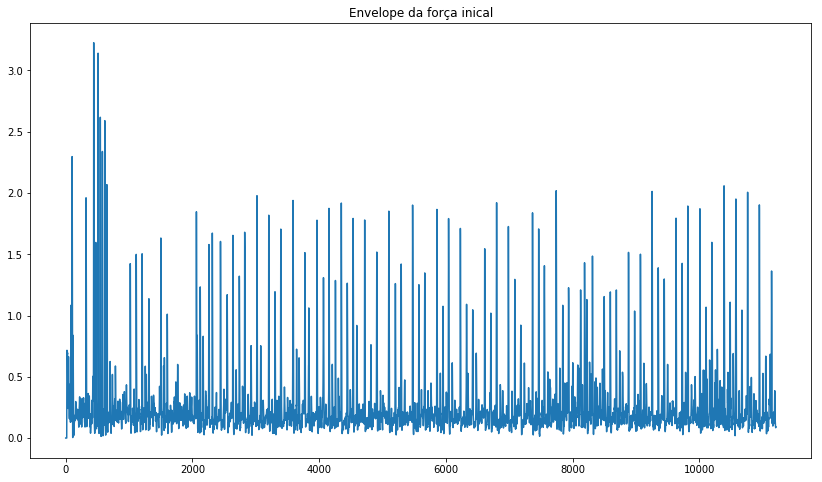

In [115]:
hop_length = 100
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)

plt.plot(onset_env)

plt.title('Envelope da força inical')

# plt.xlim(0, len(onset_env)) -> (0, 11210)

Escolha de parâmetros que preservem os grandes picos, ignorando os pequenos picos.

Em seguida, detectamos os onsets. 

Para onset.onset_detect:

    os parametros são:

        x: séries temporais de audio
        sr: taxa de amostragem de x (>0)
        hop_length: comprimento do salto (por amostragem)
        units: unidades para codificar os eventos de inicio dectados ('frames','samples','time')
        backtrack: Util para usar em onsets de ponto de fatia para segmentação
        pre_max, post_max, pre_avg, post_avg, delta: parametros adicionais para o pico de picking
        
    return: posição estimada de onsets detectados.

In [116]:
onset_samples = librosa.onset.onset_detect(x,
                                           sr=sr, units='samples', 
                                           hop_length=hop_length, 
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)

onset_samples

array([  10100,   32100,   44200,   47500,   51100,   54600,   57900,
         61700,   65000,  101900,  111300,  120600,  131300,  150200,
        160300,  206300,  212300,  226100,  231400,  244300,  254900,
        263900,  274000,  282500,  301900,  320500,  330300,  339500,
        358800,  377500,  383700,  396600,  406900,  415500,  425700,
        435000,  444400,  453600,  459400,  471900,  491000,  510000,
        520300,  529500,  547500,  557400,  566700,  585900,  595500,
        604300,  622900,  632700,  642400,  661300,  671000,  680100,
        698700,  708800,  718300,  736800,  746500,  755500,  774200,
        784500,  793700,  812700,  818900,  822500,  831400,  849900,
        859600,  869100,  888300,  897900,  907100,  925500,  935200,
        944700,  963300,  973000,  981900, 1001000, 1010700, 1019800,
       1039100, 1048700, 1057800, 1067300, 1076300, 1094800, 1114100])

Preenche os onsets com o começo e o fim do sinal.

In [117]:
onset_boundaries = numpy.concatenate([[0], onset_samples, [len(x)]])

onset_boundaries

array([      0,   10100,   32100,   44200,   47500,   51100,   54600,
         57900,   61700,   65000,  101900,  111300,  120600,  131300,
        150200,  160300,  206300,  212300,  226100,  231400,  244300,
        254900,  263900,  274000,  282500,  301900,  320500,  330300,
        339500,  358800,  377500,  383700,  396600,  406900,  415500,
        425700,  435000,  444400,  453600,  459400,  471900,  491000,
        510000,  520300,  529500,  547500,  557400,  566700,  585900,
        595500,  604300,  622900,  632700,  642400,  661300,  671000,
        680100,  698700,  708800,  718300,  736800,  746500,  755500,
        774200,  784500,  793700,  812700,  818900,  822500,  831400,
        849900,  859600,  869100,  888300,  897900,  907100,  925500,
        935200,  944700,  963300,  973000,  981900, 1001000, 1010700,
       1019800, 1039100, 1048700, 1057800, 1067300, 1076300, 1094800,
       1114100, 1120964])

Converte os onsets para segundos:

In [118]:
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)

onset_times

array([ 0.        ,  0.45804989,  1.45578231,  2.00453515,  2.15419501,
        2.31746032,  2.47619048,  2.62585034,  2.79818594,  2.9478458 ,
        4.62131519,  5.04761905,  5.46938776,  5.95464853,  6.81179138,
        7.26984127,  9.35600907,  9.62811791, 10.25396825, 10.49433107,
       11.07936508, 11.5600907 , 11.96825397, 12.42630385, 12.81179138,
       13.69160998, 14.53514739, 14.97959184, 15.3968254 , 16.27210884,
       17.12018141, 17.40136054, 17.98639456, 18.45351474, 18.84353741,
       19.30612245, 19.72789116, 20.15419501, 20.57142857, 20.83446712,
       21.40136054, 22.2675737 , 23.1292517 , 23.59637188, 24.01360544,
       24.82993197, 25.27891156, 25.70068027, 26.57142857, 27.00680272,
       27.40589569, 28.24943311, 28.69387755, 29.13378685, 29.99092971,
       30.430839  , 30.84353741, 31.68707483, 32.14512472, 32.57596372,
       33.41496599, 33.85487528, 34.26303855, 35.11111111, 35.57823129,
       35.99546485, 36.85714286, 37.138322  , 37.3015873 , 37.70

#waveplot(y [, sr, max_points, x_axis,…])  

    return: Plote o envelope de amplitude de uma forma de onda.

Text(0.5, 1.0, 'Amplitude da forma da onda')

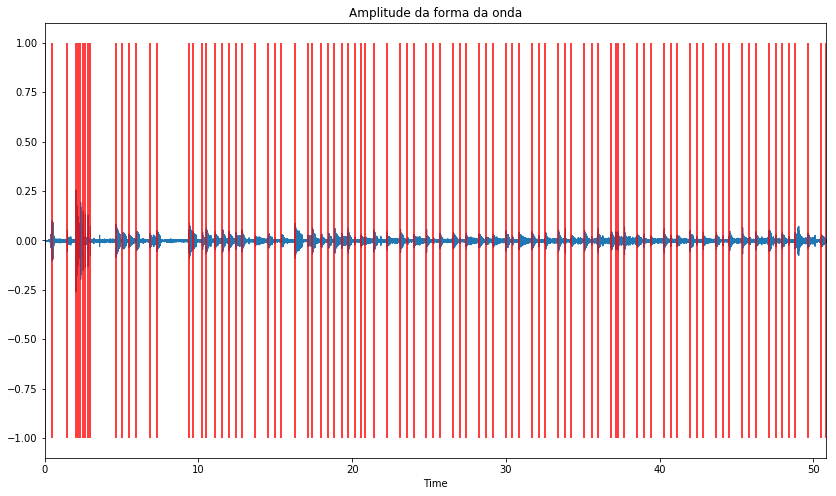

In [119]:
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')

plt.title('Amplitude da forma da onda')



Estima o tom usando o método de autocorrelação:

In [120]:
def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    
    # Computa a autocorrelação do segmento de entrada.
    r = librosa.autocorrelate(segment)
    
    # Defini os limites inferiores e superiores para o argmax de autocorrelação.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    
    # Encontra a localização da autocorrelação máxima. 
    i = r.argmax()
    f0 = float(sr)/i
    return f0

Gera um tom puro na frequência especificada:

In [121]:
def generate_sine(f0, sr, n_duration):
    n = numpy.arange(n_duration)
    return 0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))

Função auxiliar para uso em uma compreensão de lista:

In [122]:
def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    n0 = onset_samples[i]
    n1 = onset_samples[i+1]
    f0 = estimate_pitch(x[n0:n1], sr)
    return generate_sine(f0, sr, n1-n0)

Compreensão de lista para concatenar os segmentos sintetizados:

In [123]:
y = numpy.concatenate([
    estimate_pitch_and_generate_sine(x, onset_boundaries, i, sr=sr)
    for i in range(len(onset_boundaries)-1)
])

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Transcrição sintetizada.

In [124]:
ipd.Audio(y, rate=sr)

Plote o CQT da transcrição sintetizada.

In [125]:
cqt = librosa.cqt(y, sr=sr)

In [145]:
librosa.display.specshow(abs(cqt), sr=sr, x_axis='time', y_axis='cqt_note')

# plt.rcParams['figure.figsize'] = (14, 14)

plt.title('Tom de cada nota sintetizado')
plt.colorbar(format='%2.0f dB')
